In [17]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('olist_customers_dataset.csv', 'customers'),
    ('olist_geolocation_dataset.csv', 'geolocation'),
    ('olist_order_items_dataset.csv', 'order_items'),
    ('olist_order_payments_dataset.csv', 'order_payments'),
    ('olist_order_reviews_dataset.csv', 'order_reviews'),
    ('olist_orders_dataset.csv', 'orders'),
    ('olist_products_dataset.csv', 'products'),
    ('olist_sellers_dataset.csv', 'sellers')
    
            ]
# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Nepal8125',
    database='olist',
    port=3306  # Port should be passed separately
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = '/Users/sabinaadhikari/Desktop/olist.ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    insert_data = [
        tuple(None if pd.isna(x) else x for x in row)
        for _, row in df.iterrows()
    ]
    sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(df.columns))})"
    cursor.executemany(sql, insert_data)  # Use executemany for batch insert

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing olist_customers_dataset.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing olist_geolocation_dataset.csv
NaN values before replacement:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Processing olist_order_items_dataset.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing olist_order_payments_dataset.csv
NaN values before replacement:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Processing olist_order_reviews_data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect (host = 'localhost',
                             user='root',
                             password='Nepal8125',
                             database='olist')
cur = db.cursor()


In [3]:
# SQL query to fetch unique cities where customers are located
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [4]:
# SQL query to count orders placed between Jan 1, 2018, and Jun 30, 2018

query = """select count(order_id) from orders where year(order_purchase_timestamp) BETWEEN '2018-01-01' AND '2018-06-30' """

cur.execute(query)

data = cur.fetchall()

'total orders placed in first half of 2018 are', data [0][0]



('total orders placed in first half of 2018 are', 162033)

In [5]:
#Find the total sales per category.

query = """ 
SELECT p.product_category_name, 
       SUM(oi.price + oi.freight_value) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY total_revenue DESC;
       """
  

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data, columns = ['category', 'sales'])
df 

,category,sales
0,beleza_saude,1.297123e+07
1,relogios_presentes,1.174987e+07
2,cama_mesa_banho,1.117514e+07
3,esporte_lazer,1.040991e+07
4,informatica_acessorios,9.533452e+06
...,...,...
69,flores,1.439019e+04
70,casa_conforto_2,1.053522e+04
71,cds_dvds_musicais,8.594910e+03
72,fashion_roupa_infanto_juvenil,5.988240e+03


In [6]:
# SQL query to calculate percentage of orders paid by credit card or boleto
query = """
SELECT (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM order_payments)) AS percentage_paid
FROM order_payments 
WHERE payment_type IN ('boleto', 'credit_card');

"""
cur.execute(query)

data = cur.fetchall()

data [0][0]


Decimal('92.96633')

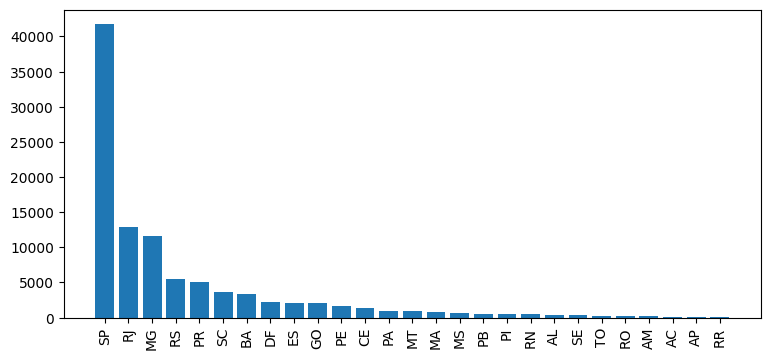

In [7]:
#Count the number of customers from each state. 

query = """
SELECT customer_state, COUNT(DISTINCT customer_id) AS total_customers
FROM customers
GROUP BY customer_state
ORDER BY total_customers DESC;
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['state', 'customer_count'])
df = df.sort_values(by = 'customer_count', ascending= False)

plt.figure(figsize =(9,4))
plt.bar(df['state'], df['customer_count'])
plt.xticks(rotation = 90)
plt.show()

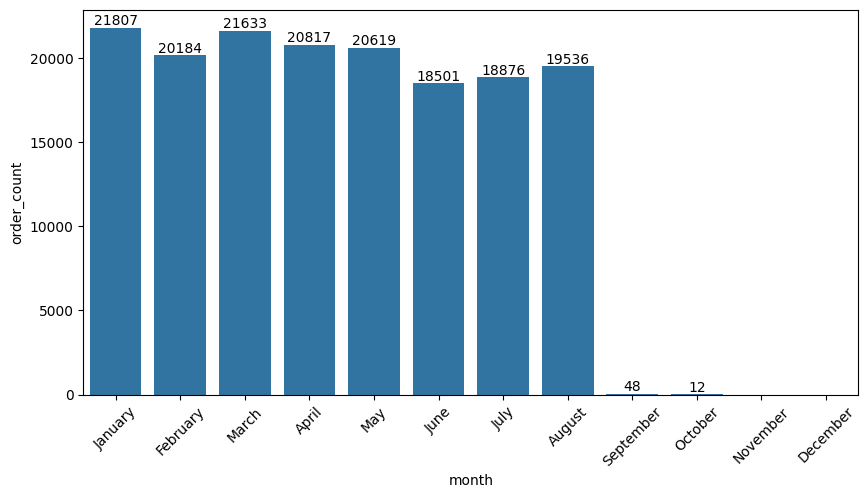

In [8]:
# SQL query to calculate number of orders per month in 2018
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

#  Execute Query
cur.execute(query)
data = cur.fetchall()

# Load Data into Pandas DataFrame
df = pd.DataFrame(data, columns=["month", "order_count"])

#  Define Month Names for X-axis
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#  Visualization Using Seaborn & Matplotlib
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df["month"], y=df["order_count"], order=month_order)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adding values on bars
ax.bar_label(ax.containers[0])

plt.show()
